In [1]:
import sv_utils
import torch 
import numpy as np
import pylab as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from os.path import dirname, realpath
from singleNeuron_omega import preSpikes, nextSpikes, STDPLIFDensePopulation, convergence_level, get_metrics, get_metrics_long_pat

# Cargamos y graficamos la salida de la FC

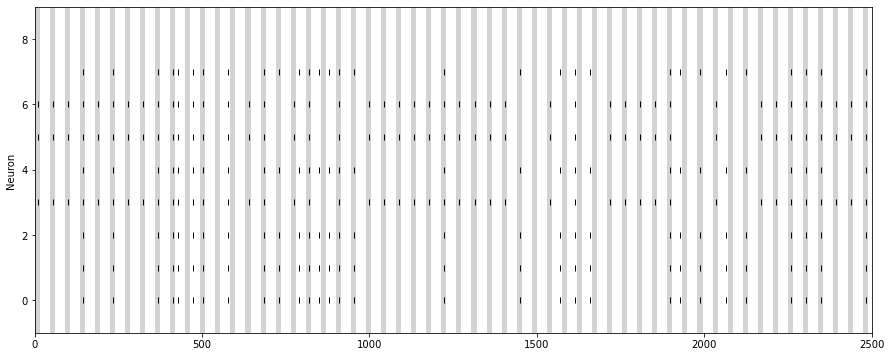

(<AxesSubplot:ylabel='Neuron '>, None)

In [24]:
plt.rcParams["figure.figsize"] =(15,6)
Sprobe_fc = torch.load('./sequences/massive_runs/1/fc_outputs/all_nums_5/training/0/fc_output_8_w0-7_th4-0.pt').numpy()
pat_times = np.load('./sequences/massive_runs/1/pat_sequences/all_nums/training/0/pat_all_nums.npy')

sv_utils.plotLIF(U=None, S=Sprobe_fc[30000:32500], pat_times=pat_times[30000:32500])

# Entrenamos a la Single Neuron con la salida de la FC

In [37]:
Sin = torch.tensor(Sprobe_fc).float()
T = Sin.shape[0]
N_out = 1
N_in = Sin.shape[1]
th = 2.7

singleNeuron = STDPLIFDensePopulation(in_channels=N_in, out_channels=N_out,
                                        weight=0.75, alpha=float(np.exp(-1e-3/10e-3)),
                                        beta=float(np.exp(-1e-3/2e-5)), delay=0,
                                        th=th, a_plus=.00010125, a_minus=.000125625,
                                        w_max=1.)


# Pre-procesamos PSpikes y NSpikes
dt_ltp = 15  # Cantidad de timesteps que miro hacia atras
dt_ltd = 60  # Cantidad de timesteps que miro hacia delante
PSpikes = preSpikes(T, dt_ltp, torch.zeros(T, N_in), Sin)
NSpikes = nextSpikes(T, dt_ltd, torch.zeros(T, N_in), Sin)

# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])

n = 0
t = 0
c_l = 1.
while (c_l > 0.01) and (t < 300000):
    state = singleNeuron.forward(Sin[n].unsqueeze(0), PSpikes[n], NSpikes[n-1])
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    n += 1
    if n >= T:
        n = 0
    c_l = convergence_level(singleNeuron.fc_layer.weight[0])
    t += 1
    if (t % 500) == 0:
        print("iter: " + str(t) + " convergence: " + str(c_l))
        

# Una vez finalizado el entrenamiento, obtenemos la salida sin entrenear
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])
for n in range(T):
    state = singleNeuron.forward_no_learning(Sin[n].unsqueeze(0))
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()


iter: 500 convergence: 0.1469972667556485
iter: 1000 convergence: 0.14665663298451426
iter: 1500 convergence: 0.14631251547805002
iter: 2000 convergence: 0.14587949868096706
iter: 2500 convergence: 0.14557206706841708
iter: 3000 convergence: 0.1454008212838298
iter: 3500 convergence: 0.14521515215608938
iter: 4000 convergence: 0.1447861337375147
iter: 4500 convergence: 0.14439565952956324
iter: 5000 convergence: 0.1442777484386495
iter: 5500 convergence: 0.14408051724310855
iter: 6000 convergence: 0.14383462214126386
iter: 6500 convergence: 0.14365010354810348
iter: 7000 convergence: 0.1432996817227492
iter: 7500 convergence: 0.14307013596217777
iter: 8000 convergence: 0.14271501158067768
iter: 8500 convergence: 0.142246721624665
iter: 9000 convergence: 0.14191394117600442
iter: 9500 convergence: 0.14166908949769752
iter: 10000 convergence: 0.14130681673826917
iter: 10500 convergence: 0.1409358458096568
iter: 11000 convergence: 0.14067479996493493
iter: 11500 convergence: 0.14036049876

iter: 92500 convergence: 0.08820900168560675
iter: 93000 convergence: 0.08795164591539395
iter: 93500 convergence: 0.08772908668636781
iter: 94000 convergence: 0.08740805234954063
iter: 94500 convergence: 0.08719796786268441
iter: 95000 convergence: 0.08695475361550509
iter: 95500 convergence: 0.08659868900198875
iter: 96000 convergence: 0.0861492986875465
iter: 96500 convergence: 0.08573048111278947
iter: 97000 convergence: 0.08548152044762913
iter: 97500 convergence: 0.0853022424984724
iter: 98000 convergence: 0.0850365915078184
iter: 98500 convergence: 0.08487329231479057
iter: 99000 convergence: 0.08449785203340054
iter: 99500 convergence: 0.08418270115862514
iter: 100000 convergence: 0.08408940385980301
iter: 100500 convergence: 0.08382620391971463
iter: 101000 convergence: 0.08344292367032313
iter: 101500 convergence: 0.08309048512173733
iter: 102000 convergence: 0.08286357999894012
iter: 102500 convergence: 0.08251511052544425
iter: 103000 convergence: 0.08201662298241175
iter: 

iter: 182000 convergence: 0.02786565976176769
iter: 182500 convergence: 0.02748947209539576
iter: 183000 convergence: 0.027146183519652034
iter: 183500 convergence: 0.02673950495912525
iter: 184000 convergence: 0.026448115225282454
iter: 184500 convergence: 0.026038385151032184
iter: 185000 convergence: 0.025702423509181394
iter: 185500 convergence: 0.025278802412588952
iter: 186000 convergence: 0.02487254702610109
iter: 186500 convergence: 0.024528505806196588
iter: 187000 convergence: 0.024136099139523193
iter: 187500 convergence: 0.02376684794336148
iter: 188000 convergence: 0.02343823699964176
iter: 188500 convergence: 0.02305589282126652
iter: 189000 convergence: 0.022826265269627832
iter: 189500 convergence: 0.02248157174152743
iter: 190000 convergence: 0.02210482491667065
iter: 190500 convergence: 0.021493706264149814
iter: 191000 convergence: 0.021183099176939724
iter: 191500 convergence: 0.020911329292766734
iter: 192000 convergence: 0.02060970970267295
iter: 192500 convergenc

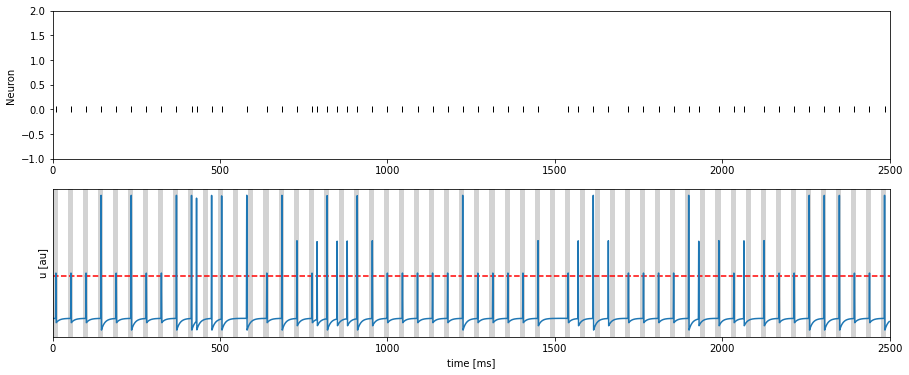

(<AxesSubplot:ylabel='Neuron '>,
 <AxesSubplot:xlabel='time [ms]', ylabel='u [au]'>)

In [38]:
pat_times = np.load('./sequences/massive_runs/1/pat_sequences/all_nums/training/0/pat_all_nums.npy')
sv_utils.plotLIF(U=Uprobe[30000:32500], S=Sprobe[30000:32500], pat_times=pat_times[30000:32500], th=2.7)

# Probamos la secuencia de Testing

In [39]:
Sin = torch.load('./sequences/massive_runs/1/fc_outputs/all_nums_5/testing/0/fc_output_8_w0-7_th3-0.pt')
T = Sin.shape[0] 

# Una vez finalizado el entrenamiento, obtenemos la salida sin entrenear
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])
for n in range(T):
    state = singleNeuron.forward_no_learning(Sin[n].unsqueeze(0))
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()

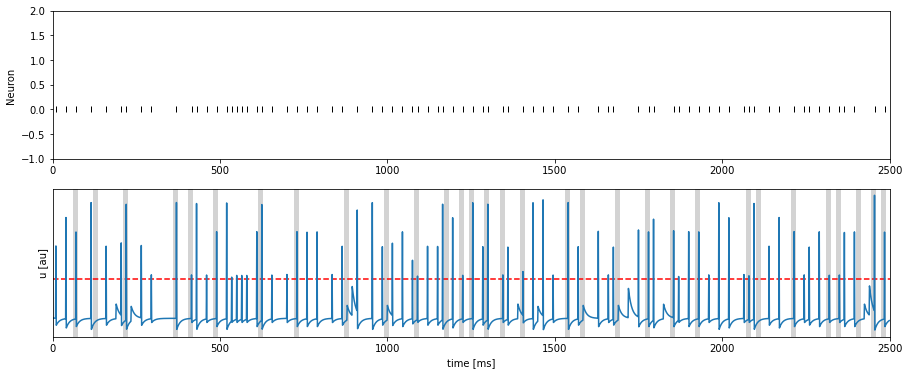

(<AxesSubplot:ylabel='Neuron '>,
 <AxesSubplot:xlabel='time [ms]', ylabel='u [au]'>)

In [40]:
pat_times = np.load('./sequences/massive_runs/1/pat_sequences/all_nums_5/testing/0/pat_test_all_nums_5.npy')
sv_utils.plotLIF(U=Uprobe[30000:32500], S=Sprobe[30000:32500], pat_times=pat_times[30000:32500], th=2.7)